#Libraries

In [ ]:
!pip install streamlit tensorflow numpy pandas scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


#GRU Model Training on Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pickle

# Load dataset (First 700 rows)
data = pd.read_csv("roman urdu poetry.csv").iloc[:700]
poetry_lines = data["Poetry"].dropna().tolist()

# Prepare Text Encoding
text = " ".join(poetry_lines)
words = text.split()
word_encoder = LabelEncoder()
word_encoder.fit(words)

word_to_index = {word: i for i, word in enumerate(word_encoder.classes_)}
index_to_word = {i: word for word, i in word_to_index.items()}

# Convert text to sequences
sequences = []
for i in range(len(words) - 5):
    sequences.append([word_to_index[word] for word in words[i : i + 6]])

sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]

# Pad sequences
X = pad_sequences(X, maxlen=5, truncating="pre")

# One-hot encode labels
y = tf.keras.utils.to_categorical(y, num_classes=len(word_to_index))

# Build the GRU Model
model = Sequential([
    Embedding(input_dim=len(word_to_index), output_dim=50, input_length=5),
    GRU(128, return_sequences=True),
    GRU(128),
    Dense(128, activation="relu"),
    Dense(len(word_to_index), activation="softmax")
])

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

# Train the Model
history = model.fit(X, y, epochs=65, batch_size=128, validation_split=0.2)

# Save Model
model.save("ghazal_model.h5")

# Save Training History
with open("training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.0396 - loss: 7.4058 - val_accuracy: 0.0432 - val_loss: 6.8810
Epoch 2/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.0409 - loss: 6.6326 - val_accuracy: 0.0454 - val_loss: 6.8731
Epoch 3/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0472 - loss: 6.4186 - val_accuracy: 0.0515 - val_loss: 6.9101
Epoch 4/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0610 - loss: 6.1780 - val_accuracy: 0.0594 - val_loss: 7.0224
Epoch 5/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0787 - loss: 5.9345 - val_accuracy: 0.0615 - val_loss: 7.1986
Epoch 6/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.0911 - loss: 5.7093 - val_accuracy: 0.0637 - val_loss: 7.3290
Epoch 7/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.1037 - loss: 5.4785 - val_accuracy: 0.0645 - val_loss: 7.6115
Epoch 8/65
569/569 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.1192 - loss: 5.2333 - val

#Model Stats

In [ ]:
# Show Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 5, 50)               │         552,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 5, 128)              │          69,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 128)                 │          99,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11044)               │       1,424,676 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,484,742 (24.74 MB)

 Trainable params: 2,161,580 (8.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,323,162 (16.49 MB)

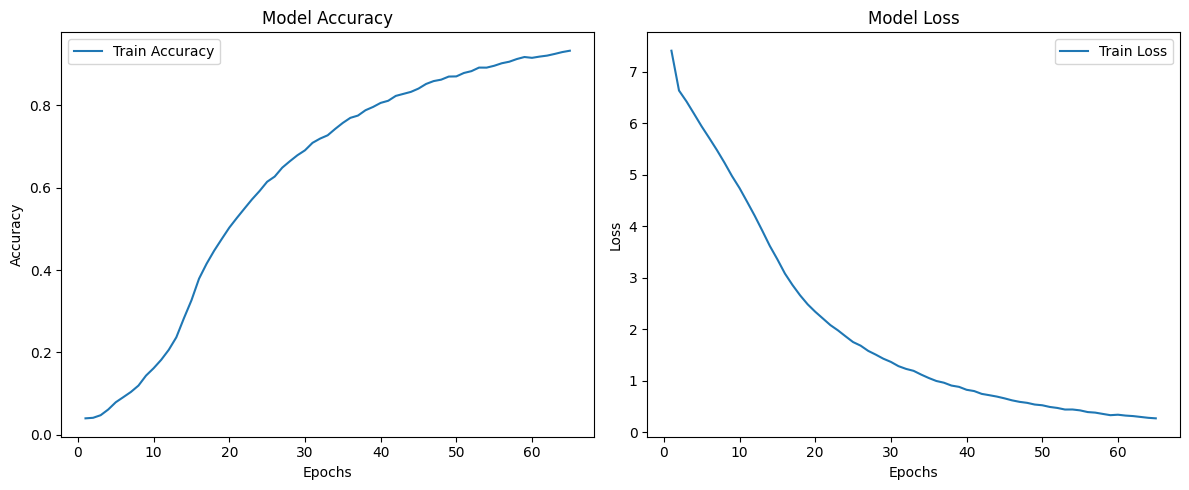

In [2]:
# Plot Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load dataset and train LabelEncoder (same one used during training)
data = pd.read_csv("roman urdu poetry.csv").iloc[:500]
poetry_lines = data["Poetry"].dropna().tolist()

text = " ".join(poetry_lines)
words = text.split()

word_encoder = LabelEncoder()
word_encoder.fit(words)
word_to_index = {word: i for i, word in enumerate(word_encoder.classes_)}
index_to_word = {i: word for word, i in word_to_index.items()}

# Load the trained model
model = tf.keras.models.load_model("ghazal_model.h5")

st.set_page_config(page_title="Ghazal Generator", page_icon="📜")

# Streamlit UI
st.title("Ghazal Generator with GRU")

# User Inputs
start_text = st.text_input("Enter starting words:", "dil ke armaan")
words_per_line = st.slider("Words per Line:", 3, 15, 5)
total_lines = st.slider("Total Lines:", 2, 10, 5)

# Function to Generate Ghazal
def generate_ghazal(start_text, words_per_line, total_lines):
    generated_text = start_text.split()

    for _ in range(total_lines * words_per_line):
        # Convert input words to numbers
        encoded_input = [word_to_index.get(word, 0) for word in generated_text[-5:]]
        encoded_input = pad_sequences([encoded_input], maxlen=5, truncating="pre")

        # Predict next word
        predicted_index = np.argmax(model.predict(encoded_input), axis=-1)[0]
        next_word = index_to_word.get(predicted_index, "")

        generated_text.append(next_word)

        # Add newline every 'words_per_line' words
        if len(generated_text) % words_per_line == 0:
            generated_text.append("\n")

    return " ".join(generated_text)

# Generate and display Ghazal
if st.button("Generate Ghazal"):
    ghazal = generate_ghazal(start_text, words_per_line, total_lines)
    st.text_area("Generated Ghazal:", ghazal, height=200)


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋

your url is: https://famous-geckos-sniff.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.247.79.72:8501

2025-02-05 13:21:22.646627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738761682.723738    5536 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738761682.748973    5536 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 13:21:22.832681: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the fo